<a href="https://colab.research.google.com/github/HaThiKhanhLy/ML/blob/main/Lab_8_20130320_HaThiKhanhLy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **GridSearchCV** for tuning the hyper-parameters of an estimator and applying vectorization techniques to the **movie reviews dataset** for classification task. 

*   **Deadline: 23:59, 17/4/2023**



# Import libraries

In [1]:
# code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML


In [68]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score ,classification_report
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.linear_model import LogisticRegression


#Task 1. With **iris** dataset
*  1.1. Apply **GridSearchCV** for **SVM** to find the best hyperparameters using the following param_grid.

```
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
```




In [3]:
#code
iris = datasets.load_iris()
x=iris.data
y=iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

Best_param: SVC(C=10, gamma=0.1)
0.980952380952381
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Predict [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
Accuracy :  0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



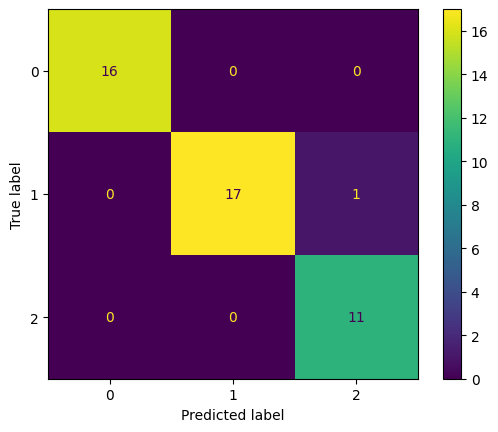

In [49]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
grid_rf_class=GridSearchCV(
    svm.SVC(), param_grid,cv=5,refit=True
)
grid_rf_class.fit(x_train,y_train)
grid_rf_class.predict(x_test)
print('Best_param:',grid_rf_class.best_estimator_)
print(grid_rf_class.best_score_)
print(grid_rf_class.best_params_)
y_predict=grid_rf_class.predict(x_test)
print('Predict',y_predict)
cm = confusion_matrix(y_test, y_predict)
print ("Accuracy : ", accuracy_score(y_test, y_predict)) 
print(classification_report(y_test,y_predict))
ConfusionMatrixDisplay.from_predictions(y_test,y_predict)


*  1.2. Apply **GridSearchCV** for **kNN** to find the best hyperparameters using the following param_grid.

```
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
```
where

    *  **n_neighbors**: Decide the best k based on the values we have computed earlier.
    *  **weights**: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points.
    *  **metric**: The distance metric to be used will calculating the similarity.


Best_param: KNeighborsClassifier()
0.961904761904762
{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
Predict [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
Accuracy :  0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



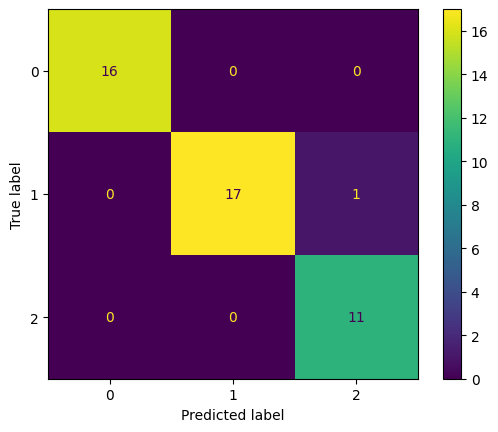

In [48]:
#code
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
knn= KNeighborsClassifier(n_neighbors = 14)
iris = datasets.load_iris()
x_knn=iris.data
y_knn=iris.target
grid_rf_class=GridSearchCV(knn, grid_params,cv=5)
x_train,x_test,y_train,y_test=train_test_split(x_knn,y_knn,test_size=0.3,random_state=0)
grid_rf_class.fit(x_train,y_train)
y_pred_train=grid_rf_class.predict(x_test)
print('Best_param:',grid_rf_class.best_estimator_)
print(grid_rf_class.best_score_)
print(grid_rf_class.best_params_)
print('Predict',y_pred_train)
cm = confusion_matrix(y_test, y_pred_train)
print ("Accuracy : ", accuracy_score(y_test, y_pred_train)) 
print(classification_report(y_test,y_pred_train))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_train)


*  1.3. Apply **GridSearchCV** for **Random Forest** to find the best hyperparameters using the following param_grid.

```
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
```

Best_param: RandomForestClassifier(max_depth=3, max_features='log2', max_leaf_nodes=3)
0.9619047619047618
{'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': 3, 'n_estimators': 100}
Predict [2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
Accuracy :  0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.94      0.94        18
           2       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



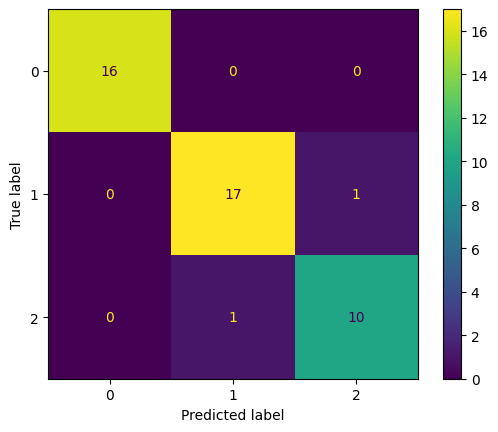

In [56]:
#code
param_grid_1_3 = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
rdF=RandomForestClassifier(n_estimators=100)
grid_rf_class=GridSearchCV(rdF, param_grid_1_3,cv=5)
iris = datasets.load_iris()
x_rdF=iris.data
y_rdF=iris.target
x_train,x_test,y_train,y_test=train_test_split(x_rdF,y_rdF,test_size=0.3,random_state=0)
grid_rf_class.fit(x_train,y_train)
grid_rf_class.predict(x_test)
print('Best_param:',grid_rf_class.best_estimator_)
print(grid_rf_class.best_score_)
print(grid_rf_class.best_params_)
y_predict_train=grid_rf_class.predict(x_test)
print('Predict',y_predict_train)
cm = confusion_matrix(y_test, y_predict_train)
print ("Accuracy : ", accuracy_score(y_test, y_predict_train)) 
print(classification_report(y_test,y_predict_train))
ConfusionMatrixDisplay.from_predictions(y_test,y_predict_train)


*   1.4 Compare the best obtained results from 1.1 to 1.3 (use PrettyTable to dispaly the results)

#Task 2. 
For breast cancer dataset (https://tinyurl.com/3vme8hr3) which could be loaded from datasets in sklearn as follows:

```
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()
```

*   Apply **GridSearchCV** to different classification algorithms such as **SVM, kNN, LogisticRegression, RandomForest**.
*   Compare the results obtained by the best hyperparameters among classification algorithms.

*   2.1. Apply **GridSearchCV** to **SVM** 


Best_param: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1, gamma=0.0001)
0.9296518987341773
Predict [1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0
 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1]
Accuracy :  0.9415204678362573
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        63
           1       0.94      0.97      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



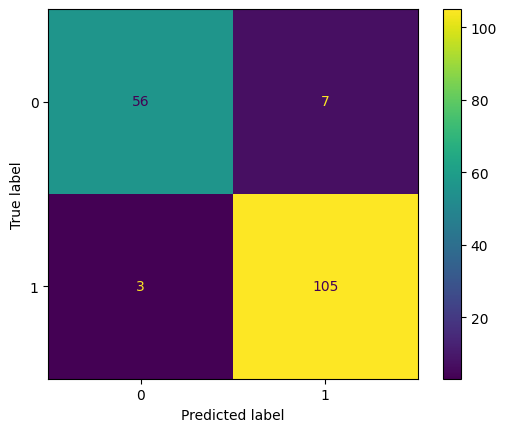

In [57]:
# code
cancer = datasets.load_breast_cancer()
X_2_1=cancer.data
y_2_1=cancer.target
X_train, X_test, y_train, y_test = train_test_split(X_2_1, y_2_1, test_size = 0.30, random_state = 1)
model = svm.SVC()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(model, param_grid, refit = True)
grid.fit(X_train, y_train)
print('Best_param:',grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)
y_predict_train=grid.predict(X_test)
print('Predict',y_predict_train)
cm = confusion_matrix(y_test, y_predict_train)
print ("Accuracy : ", accuracy_score(y_test, y_predict_train)) 
print(classification_report(y_test,y_predict_train))
ConfusionMatrixDisplay.from_predictions(y_test,y_predict_train)

*   2.2. Apply **GridSearchCV** to **kNN** 

best_param {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.0001)
0.9412311901504788
Predict [1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1]
Accuracy :  0.958041958041958
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        54
           1       0.96      0.98      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



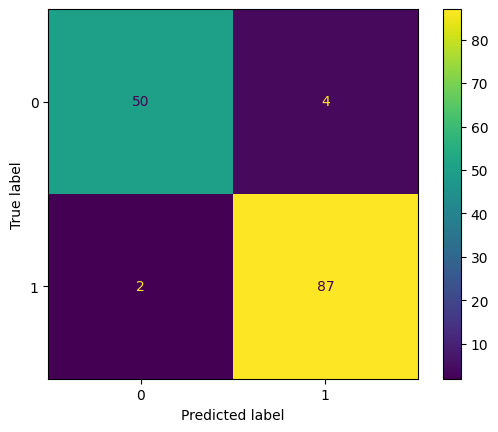

In [58]:
#code
cancer = datasets.load_breast_cancer()
X_2_2=cancer.data
y_2_2=cancer.target
X_train, X_test, y_train, y_test = train_test_split(X_2_2, y_2_2, random_state=42)
knn= KNeighborsClassifier(n_neighbors = 14)
predictions = model.predict(X_test)
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(model, param_grid, refit = True)
grid.fit(X_train, y_train)
print('best_param',grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)
y_predict_train=grid.predict(X_test)
print('Predict',y_predict_train)
cm = confusion_matrix(y_test, y_predict_train)
print ("Accuracy : ", accuracy_score(y_test, y_predict_train)) 
print(classification_report(y_test,y_predict_train))
ConfusionMatrixDisplay.from_predictions(y_test,y_predict_train)

*   2.3. Apply **GridSearchCV** to **LogisticRegression** 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

best_param {'C': 10, 'solver': 'newton-cg'}
LogisticRegression(C=10, solver='newton-cg')
0.957373417721519
Predict [1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1]
Accuracy :  0.9590643274853801
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.95      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



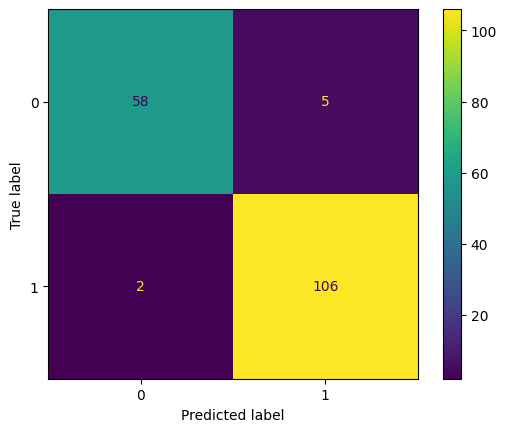

In [75]:
#code
cancer = datasets.load_breast_cancer()
X_2_3=cancer.data
y_2_3=cancer.target
x_train,x_test,y_train,y_test=train_test_split(X_2_3,y_2_3,test_size=0.3,random_state=1)
classifier = LogisticRegression(random_state =0)
classifier.fit(x_train,y_train)
y_pred_train=classifier.predict(x_test)
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100]}
logictic = LogisticRegression()
grid_rd = GridSearchCV(logictic, param_grid,refit = True)
grid_rd.fit(x_train, y_train)
print('best_param',grid_rd.best_params_)
print(grid_rd.best_estimator_)
print(grid_rd.best_score_)
y_predict_train=grid_rd.predict(x_test)
print('Predict',y_predict_train)
cm = confusion_matrix(y_test, y_predict_train)
print ("Accuracy : ", accuracy_score(y_test, y_predict_train)) 
print(classification_report(y_test,y_predict_train))
ConfusionMatrixDisplay.from_predictions(y_test,y_predict_train)

*   2.4. Apply **GridSearchCV** to **RandomForest** 

best_param {'max_depth': 6, 'max_features': 'log2', 'max_leaf_nodes': 6, 'n_estimators': 25}
RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=6,
                       n_estimators=25)
0.954873417721519
Predict [0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1
 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1]
Accuracy :  0.9415204678362573
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        63
           1       0.95      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



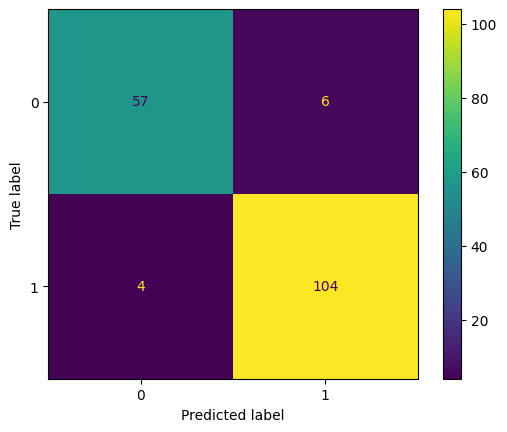

In [71]:
#code
cancer = datasets.load_breast_cancer()
X_2_4=cancer.data
y_2_4=cancer.target
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
x_train,x_test,y_train,y_test=train_test_split(X_2_4,y_2_4,test_size=0.3,random_state=0)
rdF=RandomForestClassifier(n_estimators=100)
grid_rd = GridSearchCV(rdF, param_grid, cv=5)
grid_rd.fit(x_train, y_train)
print('best_param',grid_rd.best_params_)
print(grid_rd.best_estimator_)
print(grid_rd.best_score_)
y_predict_train=grid_rd.predict(x_test)
print('Predict',y_predict_train)
cm = confusion_matrix(y_test, y_predict_train)
print ("Accuracy : ", accuracy_score(y_test, y_predict_train)) 
print(classification_report(y_test,y_predict_train))
ConfusionMatrixDisplay.from_predictions(y_test,y_predict_train)

*   2.5. Compare the best obtained results among classification algorithms (use PrettyTable to dispaly the results) 

In [ ]:
#code

#Task 3. 
The dataset consists of **2000 user-created movie reviews** archived on the IMDb(Internet Movie Database). The reviews are equally partitioned into a positive set and a negative set (1000+1000). Each review consists of a plain text file (.txt) and a class label representing the overall user opinion. 
The class attribute has only two values: **pos** (positive) or **neg** (negative).


*   3.1 Importing additional libraries

In [76]:
import nltk, random
nltk.download('movie_reviews')#download movie reviews dataset
from nltk.corpus import movie_reviews
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


*   3.2. Movie reviews information

In [77]:
#code
print(len(movie_reviews.fileids()))
print(movie_reviews.categories())
print(movie_reviews.words()[:100])
print(movie_reviews.fileids()[:10])

2000
['neg', 'pos']
['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]
['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']


*   3.3. Create dataset from movie reviews

In [78]:
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.seed(123)
random.shuffle(documents)

In [79]:
print('Number of Reviews/Documents: {}'.format(len(documents)))
print('Corpus Size (words): {}'.format(np.sum([len(d) for (d,l) in documents])))
print('Sample Text of Doc 1:')
print('-'*30)
print(' '.join(documents[0][0][:50])) # first 50 words of the first document

Number of Reviews/Documents: 2000
Corpus Size (words): 1583820
Sample Text of Doc 1:
------------------------------
most movies seem to release a third movie just so it can be called a trilogy . rocky iii seems to kind of fit in that category , but manages to be slightly unique . the rocky formula of " rocky loses fight / rocky trains / rocky wins fight


In [80]:
sentiment_distr = Counter([label for (words, label) in documents])
print(sentiment_distr)

Counter({'pos': 1000, 'neg': 1000})


*   3.4. Train test split

In [81]:
train, test = train_test_split(documents, test_size = 0.33, random_state=42)

In [82]:
## Sentiment Distrubtion for Train and Test
print(Counter([label for (words, label) in train]))
print(Counter([label for (words, label) in test]))

Counter({'neg': 674, 'pos': 666})
Counter({'pos': 334, 'neg': 326})


In [83]:
X_train = [' '.join(words) for (words, label) in train]
X_test = [' '.join(words) for (words, label) in test]
y_train = [label for (words, label) in train]
y_test = [label for (words, label) in test]

*   3.5. Text Vectorization

In [84]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf_vec = TfidfVectorizer(min_df = 10, token_pattern = r'[a-zA-Z]+')
X_train_bow = tfidf_vec.fit_transform(X_train) # fit train
X_test_bow = tfidf_vec.transform(X_test) # transform test

*   3.6. Apply **SVM** with **GridSearchCV** 

Best_param: SVC(C=10, gamma=0.1)
0.980952380952381
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Predict [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
Accuracy :  0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



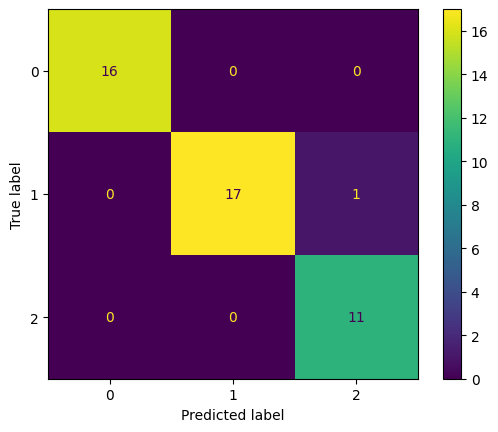

In [97]:
#code
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
grid_rf_class=GridSearchCV(
    svm.SVC(), param_grid,cv=5,refit=True
)
iris = datasets.load_iris()
x=iris.data
y=iris.target
X_train_bow,X_test_bow,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
grid_rf_class.fit(X_train_bow,y_train)
grid_rf_class.predict(X_test_bow)
print('Best_param:',grid_rf_class.best_estimator_)
print(grid_rf_class.best_score_)
print(grid_rf_class.best_params_)
y_predict=grid_rf_class.predict(X_test_bow)
print('Predict',y_predict)
cm = confusion_matrix(y_test, y_predict)
print ("Accuracy : ", accuracy_score(y_test, y_predict)) 
print(classification_report(y_test,y_predict))
ConfusionMatrixDisplay.from_predictions(y_test,y_predict)

*   3.7. Apply **RandomForest** with **GridSearchCV** 

best_param {'max_depth': 9, 'max_features': 'log2', 'max_leaf_nodes': 3, 'n_estimators': 150}
RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=3,
                       n_estimators=150)
0.9619047619047618
Predict [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
Accuracy :  0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



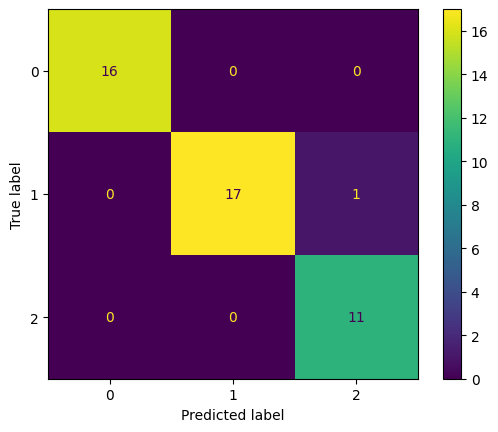

In [100]:
#code
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
X_train_bow,X_test_bow,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
rdF=RandomForestClassifier(n_estimators=100)
grid_rd = GridSearchCV(rdF, param_grid, cv=5)
grid_rd.fit(X_train_bow,y_train)
print('best_param',grid_rd.best_params_)
print(grid_rd.best_estimator_)
print(grid_rd.best_score_)
y_predict_train=grid_rd.predict(X_test_bow)
print('Predict',y_predict_train)
cm = confusion_matrix(y_test, y_predict_train)
print ("Accuracy : ", accuracy_score(y_test, y_predict_train)) 
print(classification_report(y_test,y_predict_train))
ConfusionMatrixDisplay.from_predictions(y_test,y_predict_train)

*   3.8. Apply **kNN** with **GridSearchCV** 

best_param {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, gamma=0.01)
0.9727272727272727
Predict [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



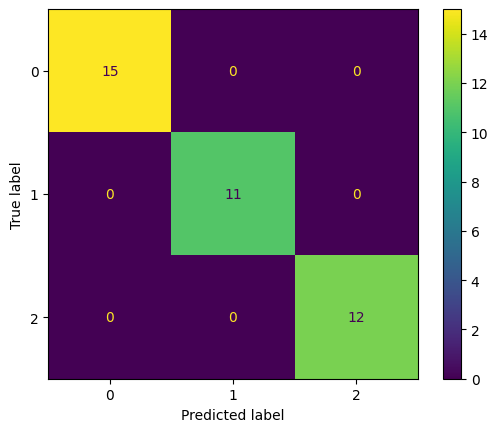

In [102]:
#code
X_train_bow, X_test_bow, y_train, y_test = train_test_split(x, y, random_state=42)
knn= KNeighborsClassifier(n_neighbors = 14)
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(model, param_grid, refit = True)
grid.fit(X_train_bow, y_train)
print('best_param',grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)
y_predict_train=grid.predict(X_test_bow)
print('Predict',y_predict_train)
cm = confusion_matrix(y_test, y_predict_train)
print ("Accuracy : ", accuracy_score(y_test, y_predict_train)) 
print(classification_report(y_test,y_predict_train))
ConfusionMatrixDisplay.from_predictions(y_test,y_predict_train)

*   3.9. Apply **LogisticRegression** with **GridSearchCV** 

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

best_param {'C': 1, 'solver': 'sag'}
LogisticRegression(C=1, solver='sag')
0.980952380952381
Predict [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 2 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
Accuracy :  0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

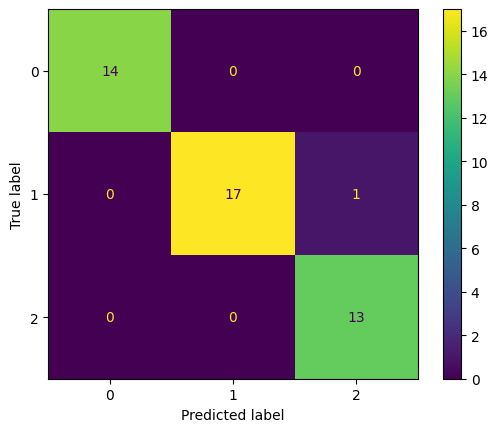

In [105]:
#code
X_train_bow,X_test_bow,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
classifier = LogisticRegression(random_state =0)
classifier.fit(X_train_bow,y_train)
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100]}
logictic = LogisticRegression()
grid_rd = GridSearchCV(logictic, param_grid,refit = True)
grid_rd.fit(X_train_bow, y_train)
print('best_param',grid_rd.best_params_)
print(grid_rd.best_estimator_)
print(grid_rd.best_score_)
y_predict_train=grid_rd.predict(X_test_bow)
print('Predict',y_predict_train)
cm = confusion_matrix(y_test, y_predict_train)
print ("Accuracy : ", accuracy_score(y_test, y_predict_train)) 
print(classification_report(y_test,y_predict_train))
ConfusionMatrixDisplay.from_predictions(y_test,y_predict_train)

*   3.10. Compare the best obtained results among classification algorithms (use PrettyTable to dispaly the results) 

#Finally,
Save a copy in your Github. Remember renaming the notebook.